In [2]:
%matplotlib inline

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [11]:
dataset = fetch_california_housing(as_frame=True)

In [12]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
house_prices = dataset.frame

In [16]:
house_prices

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


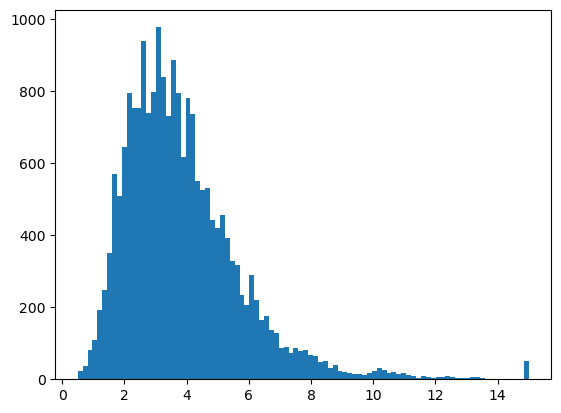

In [18]:
plt.hist(house_prices.MedInc, bins = "fd")
plt.show()

In [19]:
house_prices.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


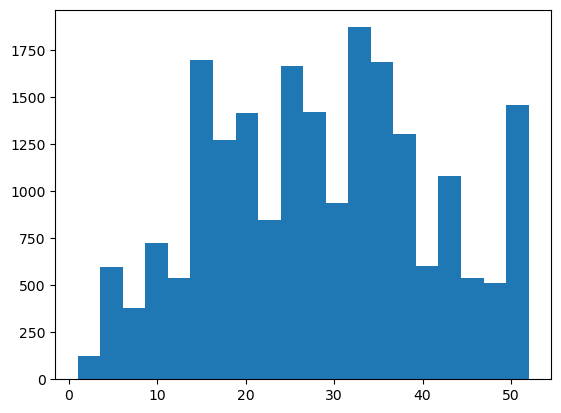

In [20]:
plt.hist(house_prices.HouseAge,bins = 20)
plt.show()

In [22]:
house_prices.HouseAge.unique()

array([41., 21., 52., 42., 50., 40., 49., 48., 51., 43.,  2., 46., 26.,
       20., 17., 36., 19., 23., 38., 35., 10., 16., 27., 39., 31., 29.,
       22., 37., 28., 34., 32., 47., 44., 30., 18., 45., 33., 24., 15.,
       14., 13., 25.,  5., 12.,  6.,  8.,  9.,  7.,  3.,  4., 11.,  1.])

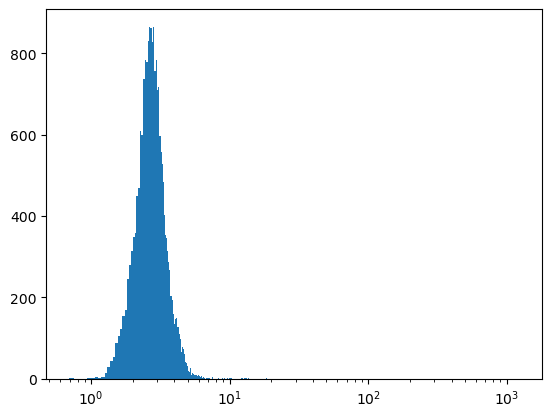

In [26]:
plt.hist(house_prices.AveOccup, bins = "fd")
plt.semilogx() # np.log10(house_prices.AveOccup)
plt.show()

In [31]:
house_prices[np.log10(house_prices.AveOccup) > 1.5].sort_values("AveOccup") # могат да се изключат тези outliers

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.62500
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500


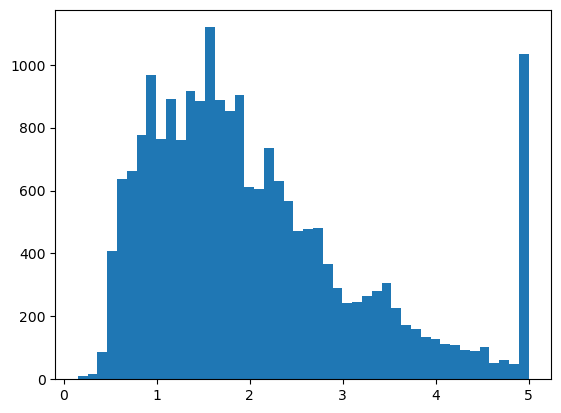

In [50]:
plt.hist(house_prices.MedHouseVal, bins = "fd")
plt.show()

In [51]:
house_prices = house_prices[house_prices.MedHouseVal <= 5]

In [52]:
model_h = LinearRegression()

In [53]:
house_features = house_prices.drop(columns=["MedHouseVal"])
house_value = house_prices.MedHouseVal

In [54]:
model_h.fit(house_features, house_value)

LinearRegression()

In [55]:
model_h.coef_

array([ 4.32039991e-01,  8.17895781e-03, -1.10512216e-01,  6.13453908e-01,
        4.59347590e-06, -3.44772055e-03, -3.79403380e-01, -3.95909847e-01])

In [56]:
model_h.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype=object)

In [57]:
list(zip(model_h.feature_names_in_, model_h.coef_))

[('MedInc', 0.43203999075155286),
 ('HouseAge', 0.008178957814135905),
 ('AveRooms', -0.11051221552017831),
 ('AveBedrms', 0.6134539079605437),
 ('Population', 4.59347589652632e-06),
 ('AveOccup', -0.0034477205518171914),
 ('Latitude', -0.3794033795650465),
 ('Longitude', -0.3959098468967242)]

In [58]:
scaler = MinMaxScaler() # tova ne e model

In [59]:
scaler.fit(house_prices)

MinMaxScaler()

In [60]:
house_features_scaled  = scaler.fit_transform(house_features)

In [61]:
house_prices.min(axis = 0)

MedInc           0.499900
HouseAge         1.000000
AveRooms         0.846154
AveBedrms        0.333333
Population       3.000000
AveOccup         0.692308
Latitude        32.540000
Longitude     -124.350000
MedHouseVal      0.149990
dtype: float64

In [62]:
house_model_scaled = LinearRegression()

In [63]:
house_model_scaled.fit(house_features_scaled, house_value)

LinearRegression()

In [64]:
house_model_scaled.coef_

array([  6.26466627,   0.41712685, -14.55304196,  20.69384516,
         0.16389063,  -4.284279  ,  -3.5701858 ,  -3.97493486])

In [67]:
z_score_scaler = StandardScaler().fit_transform(house_features)

In [68]:
z_score_model = LinearRegression()

In [69]:
z_score_model.fit(z_score_scaler, house_value)

LinearRegression()

In [70]:
z_score_model.coef_

array([ 0.67840289,  0.10230891, -0.25334703,  0.27717527,  0.00525319,
       -0.03665515, -0.81562132, -0.79421786])

In [72]:
ransac_model = RANSACRegressor()

In [73]:
ransac_model.fit(house_features_scaled, house_value)

RANSACRegressor()

In [74]:
ransac_model.estimator_.coef_

array([   5.72582774,    0.38354063,  -15.63528332,   57.91291611,
          0.77921384, -310.54241739,   -3.93777326,   -4.40927054])

In [75]:
ransac_model.inlier_mask_.sum()

14163

In [76]:
house_features[ransac_model.inlier_mask_]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [77]:
house_features[~ransac_model.inlier_mask_]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
22,1.7250,52.0,5.096234,1.131799,1015.0,2.123431,37.84,-122.27
23,2.1806,52.0,5.193846,1.036923,853.0,2.624615,37.84,-122.27
...,...,...,...,...,...,...,...,...
20621,2.3661,37.0,7.923567,1.573248,484.0,3.082803,39.01,-121.47
20625,4.1250,37.0,7.285714,1.214286,29.0,2.071429,39.12,-121.52
20627,3.0000,5.0,6.067797,1.101695,169.0,2.864407,39.13,-121.32
20629,2.0943,28.0,5.519802,1.020902,6912.0,3.801980,39.12,-121.39


In [80]:
house_model_scaled.score(house_features_scaled, house_value)

0.5701011070331934

In [79]:
ransac_model.score(house_features_scaled, house_value)

-6.9183923174933115

In [81]:
ransac_model.inlier_mask_.sum()/len(house_features_scaled)

0.7198475222363405

In [ ]:
#RANSACRegressor(estimator=) # by default изплзва LinearRegression, но може много други модел

In [82]:
experiment_ransac_model = RANSACRegressor(residual_threshold= 0.5)
experiment_ransac_model.fit(house_features_scaled, house_value)

RANSACRegressor(residual_threshold=0.5)

In [83]:
experiment_ransac_model.inlier_mask_.sum()/len(house_features_scaled) #br inliers, колкото residual_threshold е по-малко, толкова по-малко инлаиъри

0.5607623888182973